Load packages and functions.

In [22]:
using PyPlot
using Distributions
include("../singleallelesampler.jl");
include("../singleallelegibbs.jl");

INFO: Loading help data...


Simulate pedigree and genotype, then remove some genotypes.

In [28]:
init = 20;
ngen = 3;
popcap=50;
ped = pedigree_pedsim(init,ngen,popcap);
geno = pedigree_genosim(ped,0.3)[1];
geno_obs = geno[:];

cullgen = 1;
gensize = min(init * 2.^[0:(ngen-1)],popcap);
geno_obs[1:cumsum(gensize)[1]] = -1;
print(geno_obs)

[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,0,1,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,2,0,0,0,0,2,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0]

In [29]:
@time gs,maf,ϵ,z,badz =  pedigree_genogibbs(geno_obs,ped,2500);

elapsed time: 8.527742071 seconds (4377356736 bytes allocated, 32.97% gc time)


In [36]:
thin = 1001:3:2500;

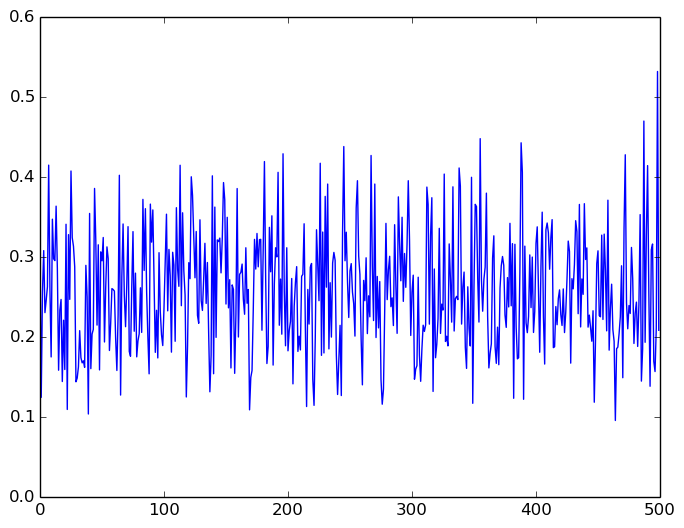

In [33]:
PyPlot.plot(maf[thin]);

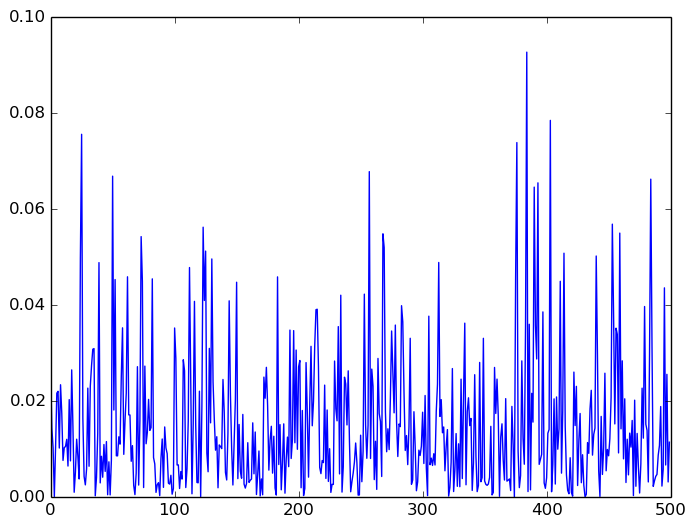

In [37]:
plot(ϵ[thin]);